In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | filingue
Processing Record 3 of Set 1 | jaora
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | ponta delgada
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | jalu
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 23 of Set 1 | drajn

Processing Record 41 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | chicama
Processing Record 44 of Set 4 | klaksvik
Processing Record 45 of Set 4 | sorong
Processing Record 46 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 47 of Set 4 | lac du bonnet
Processing Record 48 of Set 4 | porto novo
Processing Record 49 of Set 4 | hamilton
Processing Record 50 of Set 4 | saint-augustin
Processing Record 1 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | spring valley
Processing Record 4 of Set 5 | monte patria
Processing Record 5 of Set 5 | koppal
Processing Record 6 of Set 5 | kahului
Processing Record 7 of Set 5 | kirksville
Processing Record 8 of Set 5 | mackay
Processing Record 9 of Set 5 | sao joao da barra
Processing Record 10 of Set 5 | sarangani
Processing Record 11 of Set 5 | rudbar
Proce

Processing Record 29 of Set 8 | lorengau
Processing Record 30 of Set 8 | ashland
Processing Record 31 of Set 8 | naze
Processing Record 32 of Set 8 | dryden
Processing Record 33 of Set 8 | razole
Processing Record 34 of Set 8 | shu
Processing Record 35 of Set 8 | carutapera
Processing Record 36 of Set 8 | lolua
City not found. Skipping...
Processing Record 37 of Set 8 | pali
Processing Record 38 of Set 8 | pangoa
Processing Record 39 of Set 8 | qandala
Processing Record 40 of Set 8 | buala
Processing Record 41 of Set 8 | ankang
Processing Record 42 of Set 8 | abu dhabi
Processing Record 43 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 8 | chilca
Processing Record 45 of Set 8 | nicoya
Processing Record 46 of Set 8 | kem
Processing Record 47 of Set 8 | koungheul
Processing Record 48 of Set 8 | cortez
Processing Record 49 of Set 8 | tarko-sale
Processing Record 50 of Set 8 | taitung
Processing Record 1 of Set 9 | skjervoy
Processing Record 2 of Set 9 | riyadh


Processing Record 20 of Set 12 | gazanjyk
Processing Record 21 of Set 12 | mopti
Processing Record 22 of Set 12 | nalgonda
Processing Record 23 of Set 12 | yzeure
Processing Record 24 of Set 12 | el faiyum
City not found. Skipping...
Processing Record 25 of Set 12 | ucluelet
Processing Record 26 of Set 12 | mayna
Processing Record 27 of Set 12 | balta alba
City not found. Skipping...
Processing Record 28 of Set 12 | abnub
Processing Record 29 of Set 12 | pimentel
Processing Record 30 of Set 12 | marawi
Processing Record 31 of Set 12 | buraydah
Processing Record 32 of Set 12 | cayenne
Processing Record 33 of Set 12 | jiamusi
Processing Record 34 of Set 12 | bossembele
City not found. Skipping...
Processing Record 35 of Set 12 | shieli
Processing Record 36 of Set 12 | north myrtle beach
Processing Record 37 of Set 12 | leningradskiy
Processing Record 38 of Set 12 | macheng
Processing Record 39 of Set 12 | saurimo
Processing Record 40 of Set 12 | kungurtug
Processing Record 41 of Set 12 |

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,56.84,70,86,6.96,CL,2021-10-10 16:34:08
1,Filingue,14.3521,3.3168,99.61,14,99,6.87,NE,2021-10-10 16:34:08
2,Jaora,23.6333,75.1333,78.37,66,91,6.26,IN,2021-10-10 16:34:09
3,Puerto Ayora,-0.7393,-90.3518,70.56,87,88,10.00,EC,2021-10-10 16:34:09
4,Busselton,-33.6500,115.3333,53.04,72,100,11.23,AU,2021-10-10 16:34:10
5,Ponta Delgada,37.7333,-25.6667,74.12,83,40,10.36,PT,2021-10-10 16:34:10
6,Hobart,-42.8794,147.3294,41.05,79,27,1.01,AU,2021-10-10 16:29:21
7,Mataura,-46.1927,168.8643,54.48,86,100,2.55,NZ,2021-10-10 16:34:11
8,Pacific Grove,36.6177,-121.9166,65.62,79,1,1.99,US,2021-10-10 16:34:11
9,Rikitea,-23.1203,-134.9692,74.55,81,100,19.35,PF,2021-10-10 16:29:12


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [19]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2021-10-10 16:34:08,-37.6167,-73.6500,56.84,70,86,6.96
1,Filingue,NE,2021-10-10 16:34:08,14.3521,3.3168,99.61,14,99,6.87
2,Jaora,IN,2021-10-10 16:34:09,23.6333,75.1333,78.37,66,91,6.26
3,Puerto Ayora,EC,2021-10-10 16:34:09,-0.7393,-90.3518,70.56,87,88,10.00
4,Busselton,AU,2021-10-10 16:34:10,-33.6500,115.3333,53.04,72,100,11.23
5,Ponta Delgada,PT,2021-10-10 16:34:10,37.7333,-25.6667,74.12,83,40,10.36
6,Hobart,AU,2021-10-10 16:29:21,-42.8794,147.3294,41.05,79,27,1.01
7,Mataura,NZ,2021-10-10 16:34:11,-46.1927,168.8643,54.48,86,100,2.55
8,Pacific Grove,US,2021-10-10 16:34:11,36.6177,-121.9166,65.62,79,1,1.99
9,Rikitea,PF,2021-10-10 16:29:12,-23.1203,-134.9692,74.55,81,100,19.35


In [20]:
city_data_df.count()

City          570
Country       570
Date          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
dtype: int64

In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time



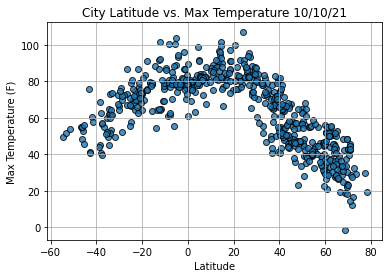

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

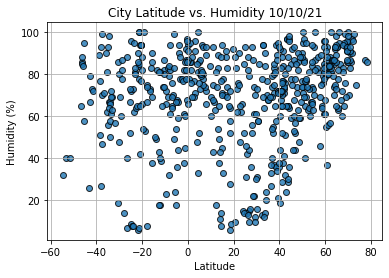

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

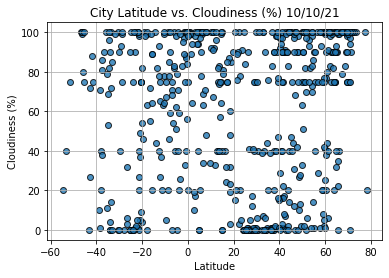

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

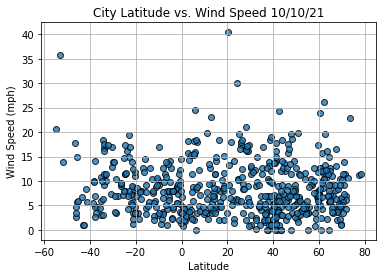

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()